# Modelos baseados em arvores para a modelagem do sistema
___

Essa ideia visa em facilitar o processo de treinamento, atualização e modelagem do sistema hidraulico do LENHS que será utilizado em conjunto com um sistema de controle Fuzzy.

In [1]:
!$PWD

/bin/bash: linha 1: /home/enacom/Documentos/github/smart-automation/ava02/pt2: É um diretório


## Bibliotecas

In [18]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from catboost import CatBoostRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
try:
    sys.path.append('/home/enacom/Documentos/github/smart-automation/utils')
    # sys.path.append(r'C:\Users\ra-no\OneDrive\Documentos\GitHub\smart-automation\utils')
    from get_metrics import get_metrics, gera_metricas
    from create_figures import difference_plot
    for path in sys.path: print(path) 
except Exception as e:
    print(e)
    print('Import error')

/home/enacom/Documentos/github/smart-automation/ava02/pt2
/home/enacom/miniconda3/envs/ava02AutomacaoInt/lib/python312.zip
/home/enacom/miniconda3/envs/ava02AutomacaoInt/lib/python3.12
/home/enacom/miniconda3/envs/ava02AutomacaoInt/lib/python3.12/lib-dynload

/home/enacom/miniconda3/envs/ava02AutomacaoInt/lib/python3.12/site-packages
/home/enacom/Documentos/github/smart-automation/utils
/home/enacom/Documentos/github/smart-automation/utils


## Dados de teste e treino

In [3]:
data = pd.read_parquet('./data/1s/train_test_data.parquet')
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6241 entries, 0 to 6240
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Frequencia CMB  6241 non-null   float64
 1   CV-1            6241 non-null   float64
 2   PT-1            6241 non-null   float64
 3   PT-2            6241 non-null   float64
 4   PT-3            6241 non-null   float64
dtypes: float64(5)
memory usage: 243.9 KB


In [4]:
for column in data.columns:
    data[column] = data[column].rolling(5).mean()

data.dropna(inplace=True)

In [5]:
data.columns

Index(['Frequencia CMB', 'CV-1', 'PT-1', 'PT-2', 'PT-3'], dtype='object')

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    data[['Frequencia CMB', 'CV-1']],
    data[['PT-1', 'PT-2', 'PT-3']],
    test_size=0.3,
    random_state=812,
    shuffle=False
)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (4365, 2)
x_test shape: (1872, 2)
y_train shape: (4365, 3)
y_test shape: (1872, 3)


Text(0, 0.5, 'Pressão (M.C.A)')

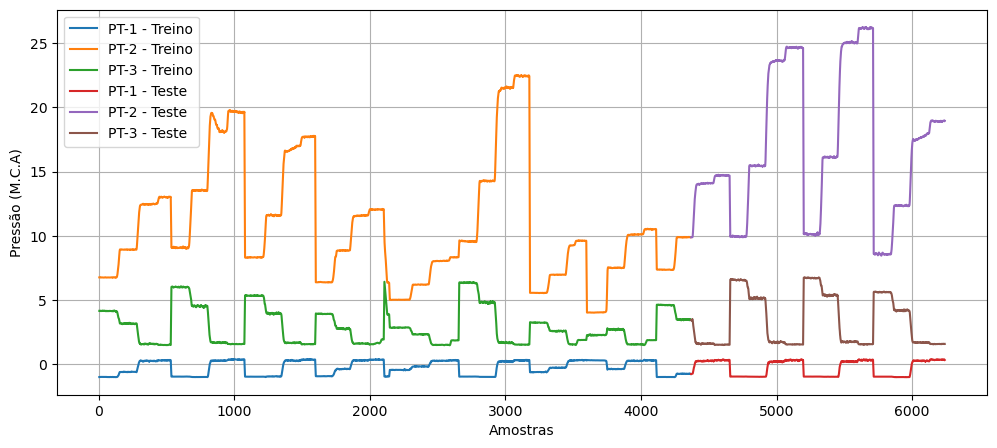

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(y_train['PT-1'], label='PT-1 - Treino')
plt.plot(y_train['PT-2'], label='PT-2 - Treino')
plt.plot(y_train['PT-3'], label='PT-3 - Treino')

plt.plot(y_test['PT-1'], label='PT-1 - Teste')
plt.plot(y_test['PT-2'], label='PT-2 - Teste')
plt.plot(y_test['PT-3'], label='PT-3 - Teste')
plt.grid()
plt.legend()
plt.xlabel('Amostras')
plt.ylabel('Pressão (M.C.A)')

## Decision Tree Model

In [8]:
dt_model = DecisionTreeRegressor(
    max_depth=3,
    # random_state=812,
)
dt_model

DecisionTreeRegressor(max_depth=3)

In [9]:
dt_model.fit(
    x_train,
    y_train
)

DecisionTreeRegressor(max_depth=3)

In [10]:
dt_model.score(x_train, y_train)

0.9212360882122

In [11]:
predicted = dt_model.predict(x_test)
predicted

array([[-0.76461264,  7.96911062,  3.75384316],
       [-0.76461264,  7.96911062,  3.75384316],
       [-0.76461264,  7.96911062,  3.75384316],
       ...,
       [ 0.30873429, 18.08003277,  1.69545175],
       [ 0.30873429, 18.08003277,  1.69545175],
       [ 0.30873429, 18.08003277,  1.69545175]])

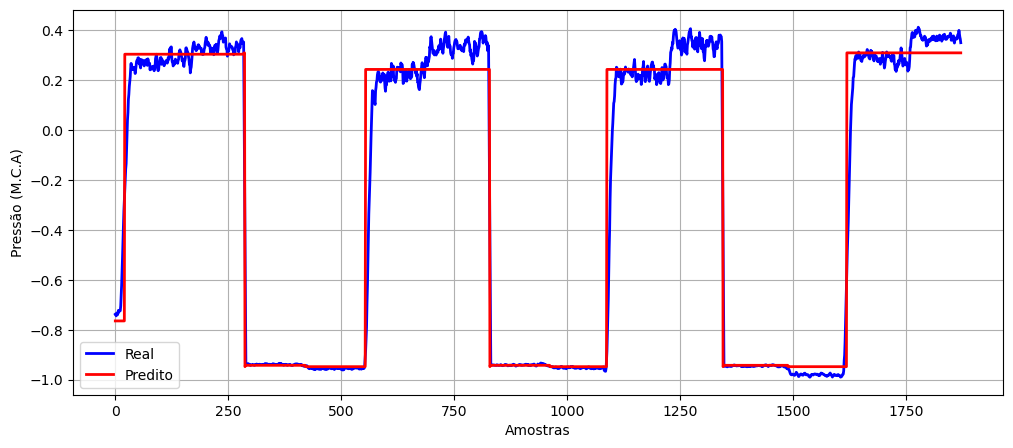

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(y_test['PT-1'].values, label='Real', linewidth=2, color='blue')
plt.plot(predicted[:, 0], label='Predito', linewidth=2, color='red')
plt.xlabel('Amostras')
plt.ylabel('Pressão (M.C.A)')
plt.legend()
plt.grid()
plt.show()

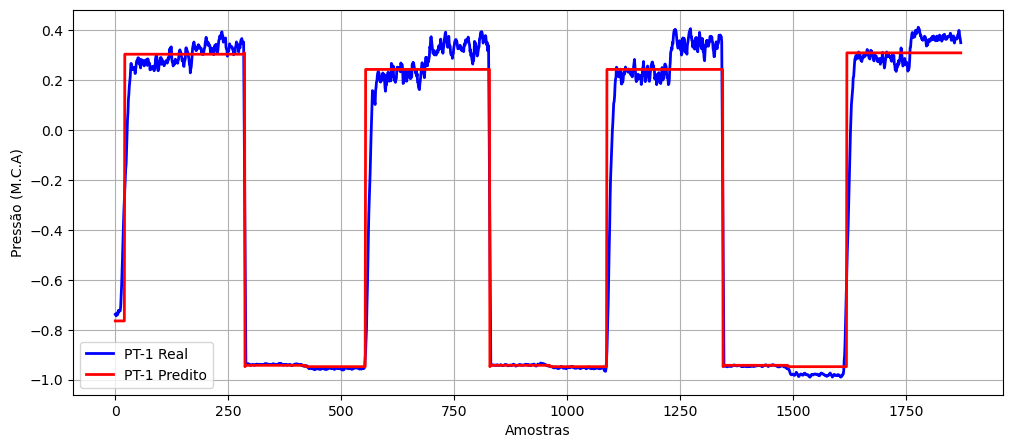

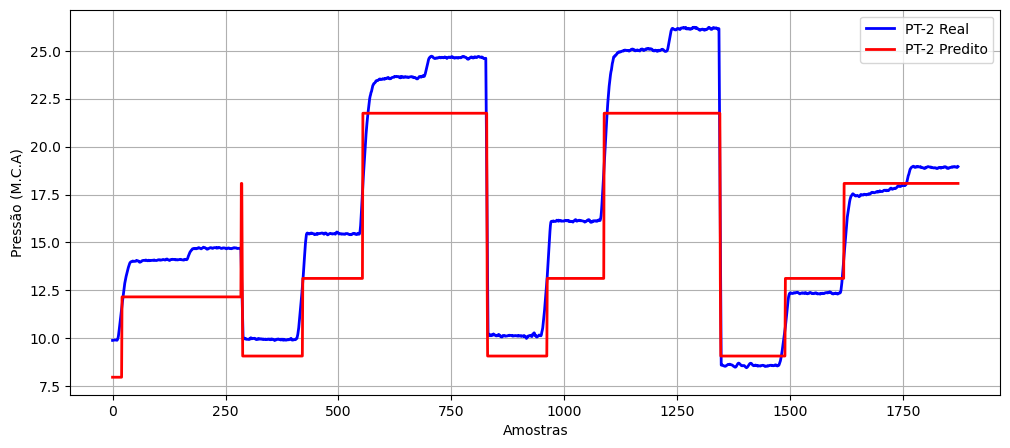

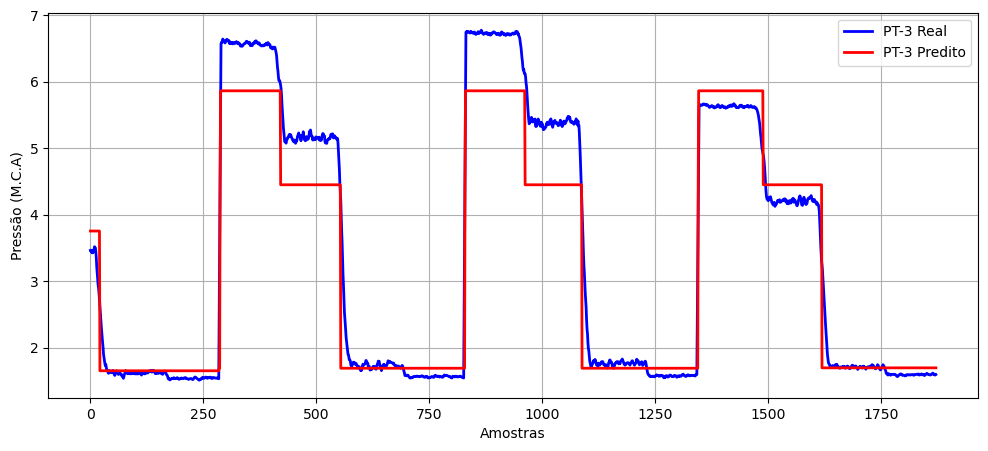

In [13]:
for col in enumerate(y_test.columns):
    plt.figure(figsize=(12, 5))
    plt.plot(y_test[col[1]].values, label=f'{col[1]} Real', linewidth=2, color='blue')
    plt.plot(predicted[:, col[0]], label=f'{col[1]} Predito', linewidth=2, color='red')
    plt.xlabel('Amostras')
    plt.ylabel('Pressão (M.C.A)')
    plt.legend()
    plt.grid()
    plt.show()

In [14]:
dt_model.feature_importances_

array([0.52542072, 0.47457928])

[Text(0.5, 0.875, 'Frequencia CMB <= 45.6\nsquared_error = 8.064\nsamples = 4365\nvalue = [[-0.248]\n[10.742]\n[2.938]]'),
 Text(0.25, 0.625, 'CV-1 <= 38.763\nsquared_error = 2.343\nsamples = 2780\nvalue = [[-0.188]\n[8.329]\n[2.612]]'),
 Text(0.125, 0.375, 'Frequencia CMB <= 36.9\nsquared_error = 1.091\nsamples = 1702\nvalue = [[-0.497]\n[6.902]\n[3.208]]'),
 Text(0.0625, 0.125, 'squared_error = 0.52\nsamples = 860\nvalue = [[-0.236]\n[5.856]\n[2.674]]'),
 Text(0.1875, 0.125, 'squared_error = 0.68\nsamples = 842\nvalue = [[-0.765]\n[7.969]\n[3.754]]'),
 Text(0.375, 0.375, 'Frequencia CMB <= 37.3\nsquared_error = 0.943\nsamples = 1078\nvalue = [[0.3]\n[10.582]\n[1.67]]'),
 Text(0.3125, 0.125, 'squared_error = 0.322\nsamples = 585\nvalue = [[0.297]\n[9.252]\n[1.686]]'),
 Text(0.4375, 0.125, 'squared_error = 0.149\nsamples = 493\nvalue = [[0.303]\n[12.16]\n[1.651]]'),
 Text(0.75, 0.625, 'CV-1 <= 36.111\nsquared_error = 8.545\nsamples = 1585\nvalue = [[-0.352]\n[14.974]\n[3.511]]'),
 Text

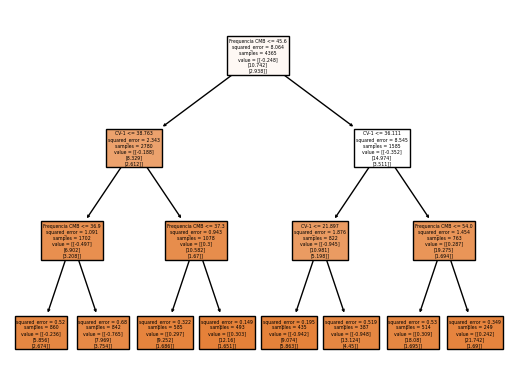

In [15]:
plot_tree(
    dt_model,
    filled=True,
    feature_names=x_train.columns,
    class_names=['PT-1', 'PT-2', 'PT-3'],
)

### Metricas

In [29]:
df_metricas = pd.DataFrame()
df_metricas = y_test.reset_index(drop=True).copy()
df_metricas['pt1_pred_dt'] = predicted[:, 0]
df_metricas['pt2_pred_dt'] = predicted[:, 1]
df_metricas['pt3_pred_dt'] = predicted[:, 2]

df_metricas.head()

,PT-1,PT-2,PT-3,pt1_pred_dt,pt2_pred_dt,pt3_pred_dt
0,-0.737663,9.890104,3.463444,-0.764613,7.969111,3.753843
1,-0.736133,9.892448,3.466113,-0.764613,7.969111,3.753843
2,-0.744336,9.890364,3.442025,-0.764613,7.969111,3.753843
3,-0.741097,9.901692,3.447298,-0.764613,7.969111,3.753843
4,-0.732601,9.911849,3.424544,-0.764613,7.969111,3.753843


In [19]:
help(gera_metricas)

Help on function gera_metricas in module get_metrics:

gera_metricas(df, nome_real, nome_previsto, verbose=False)
    Recebe um dataframe contendo uma coluna com os valores reais (nome_real) e uma coluna com os valores preditos
    (nome_previsto) e os nomes dessas colunas.

    Retorna um dicionário contendo as métricas calculadas e um dataframe contendo os pontos nas duas curvas cujo
    erro absoluto é máximo.

    Métricas calculadas:
    RMSE: Raíz quadrada do erro médio quadrático.
    MSE: Erro médio quadrático.
    MAE: Erro médio absoluto.
    MAXE: Máximo erro absoluto.
    MAXPE: Erro máximo percentual absoluto - Valor percentual do máximo erro absoluto.
    Dessa forma, o ponto utilizado para calcular essa métrica é o mesmo ponto do valor máximo absoluto.
    MAPE: Erro médio percentual. Desconsidera valores abaixo de 1 do valor real da variável de saída. Isso evita que
    o valor dessa métrica tenda a infinito por conta de pontos onde a variável de saída tende a zero.
   

In [30]:
get_metrics(
    df_metricas['PT-1'].values,
    df_metricas['pt1_pred_dt'].values
)

MAE: 0.05
MSE: 0.0139
RMSE: 0.118
MAPE: 29.3817
ERPM: 11407.6769


## CatBoost Model

In [31]:
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.01,
    depth=3,
    verbose=0,
)
cat_model

In [33]:
cat_model.fit(
    x_train,
    y_train['PT-1'],
)

In [34]:
cat_model.score(x_train, y_train['PT-1'])

0.9849937659115718

In [35]:
cat_predicted = cat_model.predict(x_test)
cat_predicted

array([-0.74479171, -0.74693167, -0.74477596, ...,  0.3669794 ,
        0.36779969,  0.36779969])

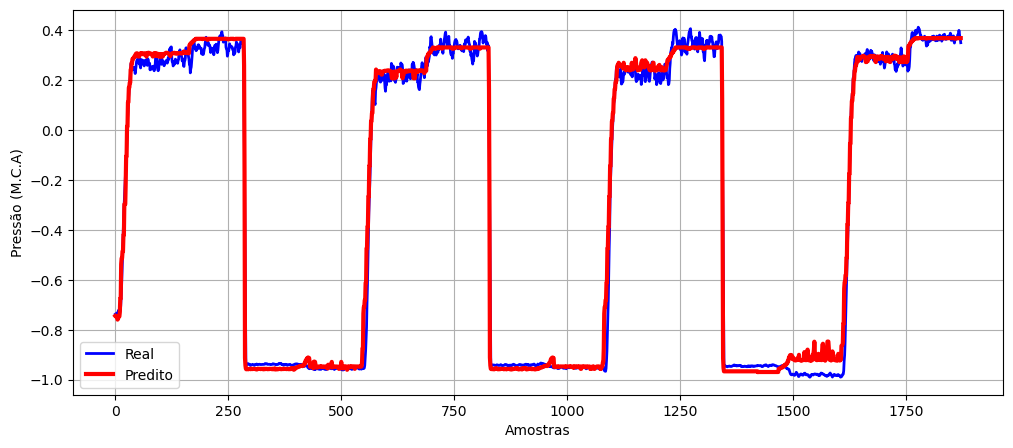

In [36]:
plt.figure(figsize=(12, 5))
plt.plot(y_test['PT-1'].values, label='Real', linewidth=2, color='blue')
plt.plot(cat_predicted, label='Predito', linewidth=3, color='red')
plt.xlabel('Amostras')
plt.ylabel('Pressão (M.C.A)')
plt.legend()
plt.grid()
plt.show()

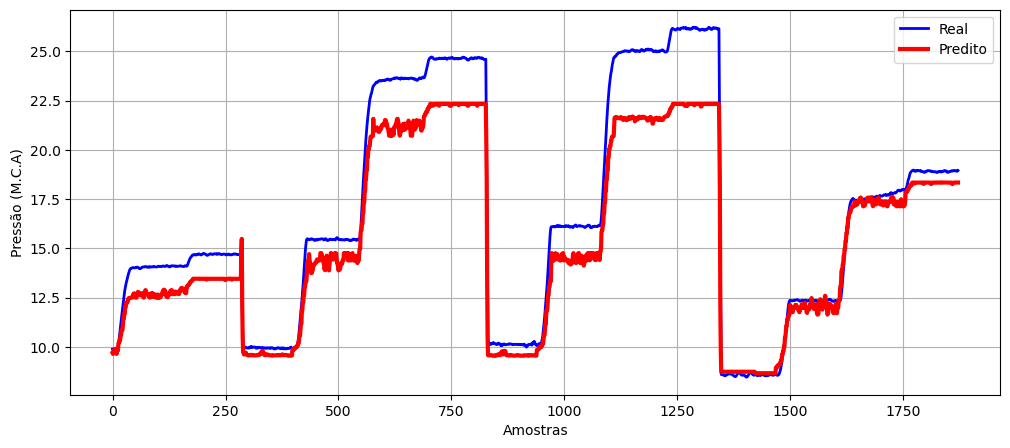

In [37]:
cat_model2 = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.01,
    depth=3,
    verbose=0,
)

cat_model2.fit(
    x_train,
    y_train['PT-2'],
)

cat_model2.score(x_train, y_train['PT-2'])

plt.figure(figsize=(12, 5))
plt.plot(y_test['PT-2'].values, label='Real', linewidth=2, color='blue')
plt.plot(cat_model2.predict(x_test), label='Predito', linewidth=3, color='red')
plt.xlabel('Amostras')
plt.ylabel('Pressão (M.C.A)')
plt.legend()
plt.grid()
plt.show()

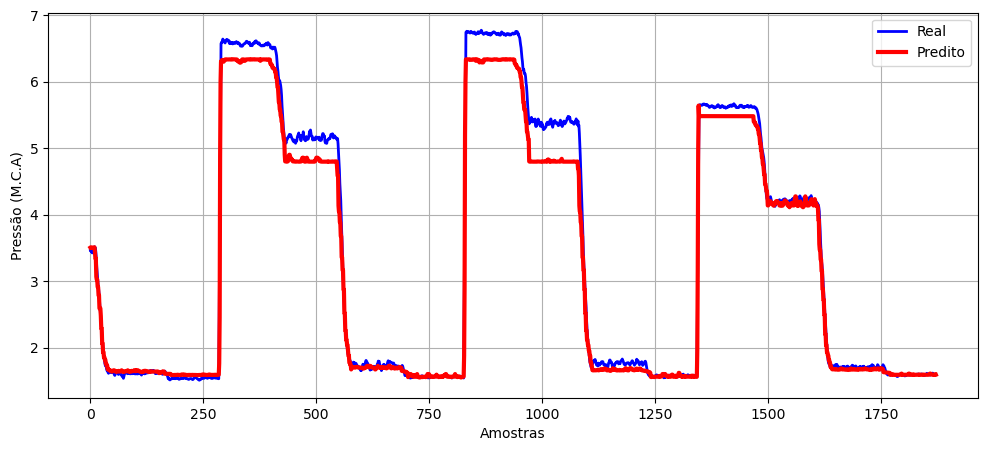

In [38]:
cat_model3 = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.01,
    depth=3,
    verbose=0,
)

cat_model3.fit(
    x_train,
    y_train['PT-3'],
)

cat_model3.score(x_train, y_train['PT-3'])

plt.figure(figsize=(12, 5))
plt.plot(y_test['PT-3'].values, label='Real', linewidth=2, color='blue')
plt.plot(cat_model3.predict(x_test), label='Predito', linewidth=3, color='red')
plt.xlabel('Amostras')
plt.ylabel('Pressão (M.C.A)')
plt.legend()
plt.grid()
plt.show()

### Metricas

In [39]:
df_metricas['pt1_pred_cat'] = cat_predicted
df_metricas['pt2_pred_cat'] = cat_model2.predict(x_test)
df_metricas['pt3_pred_cat'] = cat_model3.predict(x_test)

df_metricas.head()

,PT-1,PT-2,PT-3,pt1_pred_dt,pt2_pred_dt,pt3_pred_dt,pt1_pred_cat,pt2_pred_cat,pt3_pred_cat
0,-0.737663,9.890104,3.463444,-0.764613,7.969111,3.753843,-0.744792,9.697641,3.505070
1,-0.736133,9.892448,3.466113,-0.764613,7.969111,3.753843,-0.746932,9.646076,3.509734
2,-0.744336,9.890364,3.442025,-0.764613,7.969111,3.753843,-0.744776,9.697972,3.504580
3,-0.741097,9.901692,3.447298,-0.764613,7.969111,3.753843,-0.747364,9.840284,3.504615
4,-0.732601,9.911849,3.424544,-0.764613,7.969111,3.753843,-0.747364,9.840284,3.504615


In [40]:
get_metrics(
    df_metricas['PT-1'].values,
    df_metricas['pt1_pred_cat'].values
)

MAE: 0.0304
MSE: 0.0027
RMSE: 0.0518
MAPE: 9.88
ERPM: 1891.7081


In [41]:
get_metrics(
    df_metricas['PT-2'].values,
    df_metricas['pt2_pred_cat'].values
)

MAE: 1.3641
MSE: 3.1609
RMSE: 1.7779
MAPE: 7.1465
ERPM: 23.2357


In [42]:
get_metrics(
    df_metricas['PT-3'].values,
    df_metricas['pt3_pred_cat'].values
)

MAE: 0.1575
MSE: 0.0583
RMSE: 0.2415
MAPE: 3.731
ERPM: 30.9089


### Feature importance

In [45]:
for col, value in zip(x_train.columns, cat_model.get_feature_importance()):
    print(f'{col}: {value}')

Frequencia CMB: 24.968220130486152
CV-1: 75.03177986951384


In [46]:
for col, value in zip(x_train.columns, cat_model2.get_feature_importance()):
    print(f'{col}: {value}')

Frequencia CMB: 53.97204890571063
CV-1: 46.02795109428937


In [47]:
for col, value in zip(x_train.columns, cat_model3.get_feature_importance()):
    print(f'{col}: {value}')

Frequencia CMB: 34.493023536075775
CV-1: 65.50697646392423


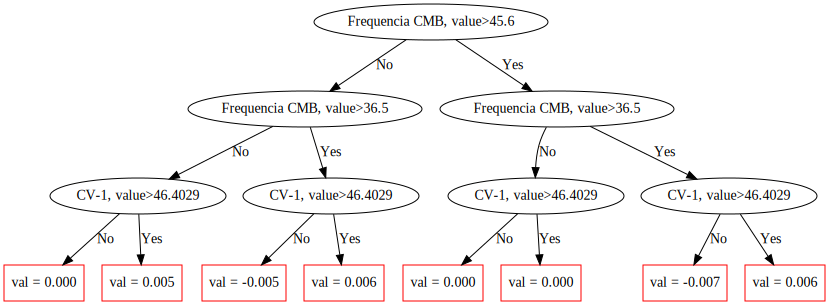

In [53]:
cat_model.plot_tree(
    tree_idx=0,
    pool=x_train,
)

In [56]:
cat_model.save_model('./models/cat_model_pt1.cbm')

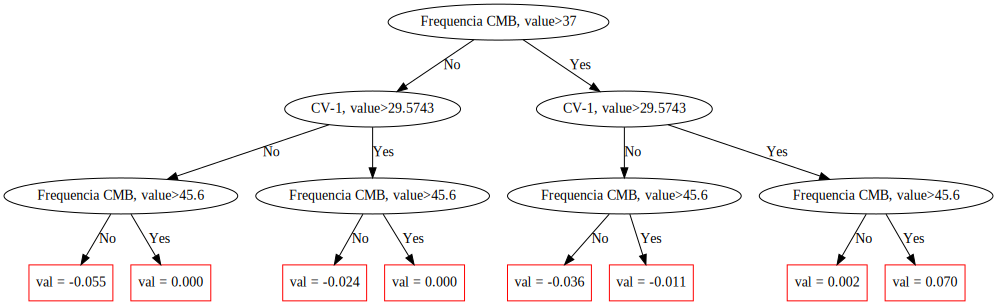

In [54]:
cat_model2.plot_tree(
    tree_idx=0,
    pool=x_train,
)

In [57]:
cat_model2.save_model('./models/cat_model_pt2.cbm')

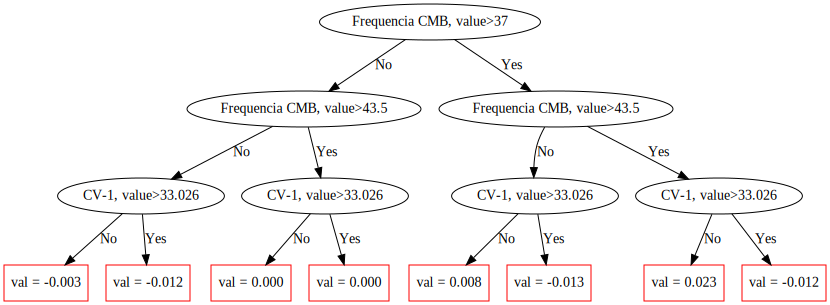

In [55]:
cat_model3.plot_tree(
    tree_idx=0,
    pool=x_train,
)

In [58]:
cat_model2.save_model('./models/cat_model_pt3.cbm')

In [59]:
df_metricas

,PT-1,PT-2,PT-3,pt1_pred_dt,pt2_pred_dt,pt3_pred_dt,pt1_pred_cat,pt2_pred_cat,pt3_pred_cat
0,-0.737663,9.890104,3.463444,-0.764613,7.969111,3.753843,-0.744792,9.697641,3.505070
1,-0.736133,9.892448,3.466113,-0.764613,7.969111,3.753843,-0.746932,9.646076,3.509734
2,-0.744336,9.890364,3.442025,-0.764613,7.969111,3.753843,-0.744776,9.697972,3.504580
3,-0.741097,9.901692,3.447298,-0.764613,7.969111,3.753843,-0.747364,9.840284,3.504615
4,-0.732601,9.911849,3.424544,-0.764613,7.969111,3.753843,-0.747364,9.840284,3.504615
...,...,...,...,...,...,...,...,...,...
1867,0.398747,18.929167,1.591406,0.308734,18.080033,1.695452,0.367800,18.346665,1.591584
1868,0.385270,18.921354,1.597070,0.308734,18.080033,1.695452,0.366979,18.346665,1.596670
1869,0.372111,18.946354,1.587012,0.308734,18.080033,1.695452,0.366979,18.346665,1.596670
1870,0.363883,18.927604,1.588770,0.308734,18.080033,1.695452,0.367800,18.346665,1.588811


## Salvando valores reais e previstos

In [61]:
df_metricas.to_parquet('./models/tree_models_metrics.parquet')
df_metricas.to_csv('./models/tree_models_metrics.csv')

## Recarregando um modelo

In [62]:
cat_model_reloaded = CatBoostRegressor()
cat_model_reloaded.load_model('./models/cat_model_pt1.cbm')

In [64]:
a = cat_model_reloaded.predict(x_test)
a

array([-0.74479171, -0.74693167, -0.74477596, ...,  0.3669794 ,
        0.36779969,  0.36779969])

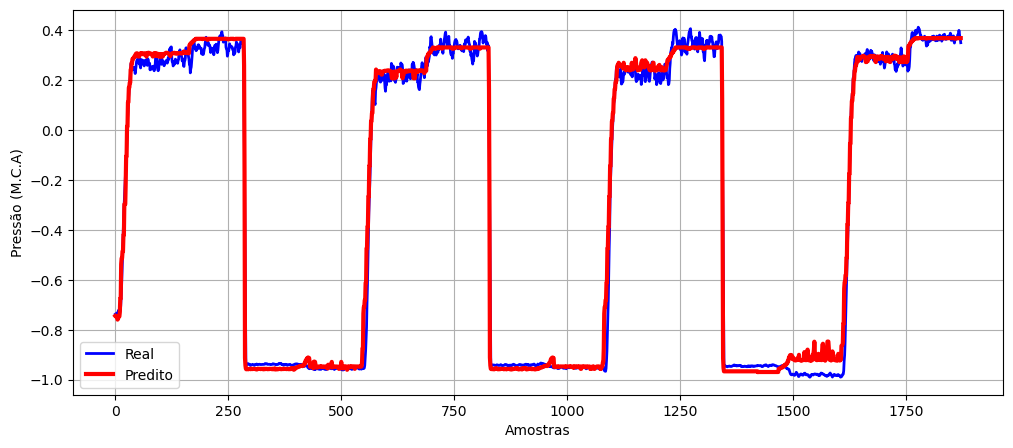

In [65]:
plt.figure(figsize=(12, 5))
plt.plot(y_test['PT-1'].values, label='Real', linewidth=2, color='blue')
plt.plot(a, label='Predito', linewidth=3, color='red')
plt.xlabel('Amostras')
plt.ylabel('Pressão (M.C.A)')
plt.legend()
plt.grid()
plt.show()

In [66]:
get_metrics(
    y_test['PT-1'].values,
    a
)

MAE: 0.0304
MSE: 0.0027
RMSE: 0.0518
MAPE: 9.88
ERPM: 1891.7081
